# Generation of the simulation 

### News :
- adaptative dt
- begin to the (2nd) stable equilibrium
- different variability
- different collapse (collapse proba and collapse proba per time unit)
- different application to the variability

In [1]:
import time as tm
import colorsys
import pickle # package use to save data

exec(open("solver2.py").read(), globals())
exec(open("param.py").read(), globals())

In [2]:
def exemples(name, Number_of_simulation = 100, mean = True, **kwargs):
    name = name+"_freq="+str(kwargs["Fire_param"]["param_freq"]["p"])+".png"
    O = Ode(**kwargs)
    Y = O.solve_by_part()
    O.plot_time_series(save = True, name = name, generation = True, show = False)
    return Y

In [3]:
def param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name):
   # Color = ["blue", "g", "red", "orange", "pink", "black", "magenta", "grey"]
    Param_coupled = {"alpha":alpha,
                     "beta":beta}
    Param_freq = {"p":-1} # going to change
    Param_strength = {"scale":strength}
    Fire_param = {"model": "coupled",
                    "frequence": "bernoulli",
                    "param_freq" : Param_freq,
                    "amplitude": "exponential",
                    "Param_strength" : Param_strength,
                    "Param_coupled" : Param_coupled,
                    "type" : "proportionnal",
                    "coef_W_N" : 5}


    # Initialization of arrays
    Collapse_proba = np.zeros((numbreDePoint, len(Freq)))
    Collapse_proba_per_time_unit = np.zeros_like(Collapse_proba)

    Variability_always_N = np.zeros_like(Collapse_proba)
    Variability_until_N = np.zeros_like(Collapse_proba)
    Variability_10_N = np.zeros_like(Collapse_proba)
    Variability_only_N = np.zeros_like(Collapse_proba)
    Variability_tr10_N = np.zeros_like(Collapse_proba)
    Variability_tr0_N = np.zeros_like(Collapse_proba)
    
    Variability_always_W = np.zeros_like(Collapse_proba)
    Variability_until_W = np.zeros_like(Collapse_proba)
    Variability_10_W = np.zeros_like(Collapse_proba)
    Variability_only_W = np.zeros_like(Collapse_proba)
    Variability_tr10_W = np.zeros_like(Collapse_proba)
    Variability_tr0_W = np.zeros_like(Collapse_proba)
    
    Variability_always_NW = np.zeros_like(Collapse_proba)
    Variability_until_NW = np.zeros_like(Collapse_proba)
    Variability_10_NW = np.zeros_like(Collapse_proba)
    Variability_only_NW = np.zeros_like(Collapse_proba)
    Variability_tr10_NW = np.zeros_like(Collapse_proba)
    Variability_tr0_NW = np.zeros_like(Collapse_proba)
    
    #Exemples = np.zeros(len(Freq))
    
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire_param["param_freq"] = Param_freq
        dt = min(0.1, 0.1/freq)
        #Init = [1, Param_phy[1]]
        exemples(name = name, Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        for j in range(numbreDePoint):
            S = Solver(numberOfSimulation=Number_of_simulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            S.run()
            Collapse_proba[j,i] = S.collapse_proba()
            Collapse_proba_per_time_unit[j,i] = S.collapse_proba_per_time_unit()

            Variability_always_N[j,i] = S.variability_always(applicant="N")
            Variability_until_N[j,i] = S.variability_until(applicant="N")
            Variability_10_N[j,i] = S.variability_10(applicant="N")
            Variability_only_N[j,i] = S.variability_only(applicant="N")
            Variability_tr10_N[j,i] = S.variability_tr10(applicant="N")
            Variability_tr0_N[j,i] = S.variability_tr0(applicant="N")
            
            Variability_always_W[j,i] = S.variability_always(applicant="W")
            Variability_until_W[j,i] = S.variability_until(applicant="W")
            Variability_10_W[j,i] = S.variability_10(applicant="W")
            Variability_only_W[j,i] = S.variability_only(applicant="W")
            Variability_tr10_W[j,i] = S.variability_tr10(applicant="W")
            Variability_tr0_W[j,i] = S.variability_tr0(applicant="W")
            
            Variability_always_NW[j,i] = S.variability_always(applicant="N+W")
            Variability_until_NW[j,i] = S.variability_until(applicant="N+W")
            Variability_10_NW[j,i] = S.variability_10(applicant="N+W")
            Variability_only_NW[j,i] = S.variability_only(applicant="N+W")
            Variability_tr10_NW[j,i] = S.variability_tr10(applicant="N+W")
            Variability_tr0_NW[j,i] = S.variability_tr0(applicant="N+W")
            
           # print("\nTime solve init", t05-t0)
            #print("Time solver ", t1-t05)
            #print("Time collapse ", t2-t1)
            #print("Time variability ", t3-t2)
            
    Measures = {"Collapse_proba": Collapse_proba,
                "Collapse_proba_per_time_unit": Collapse_proba_per_time_unit, 
                
                "Variability_always_N": Variability_always_N, 
                "Variability_until_N":Variability_until_N,
                "Variability_10_N":Variability_10_N,
                "Variability_only_N":Variability_only_N,
                "Variability_tr10_N": Variability_tr10_N,
                "Variability_tr0_N": Variability_tr0_N,
                
                "Variability_always_W": Variability_always_W, 
                "Variability_until_W":Variability_until_W,
                "Variability_10_W":Variability_10_W,
                "Variability_only_W":Variability_only_W,
                "Variability_tr10_W": Variability_tr10_W,
                "Variability_tr0_W": Variability_tr0_W,
                
                "Variability_always_NW": Variability_always_NW, 
                "Variability_until_NW":Variability_until_NW,
                "Variability_10_NW":Variability_10_NW,
                "Variability_only_NW":Variability_only_NW,
                "Variability_tr10_NW": Variability_tr10_NW,
                "Variability_tr0_NW": Variability_tr0_NW              
               }
    
    # save data
    pickle_out = open(name+".txt","wb")
    pickle.dump(Measures, pickle_out)
    pickle_out.close()
    
    return

Thu Apr 18 11:26:17 2019 , Figure  15 (total  1440 )
Thu Apr 18 11:31:01 2019 , Figure  30 (total  1440 )
Thu Apr 18 11:35:46 2019 , Figure  45 (total  1440 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:197: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:215: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:198: RuntimeWarning: Mean of empty slice


Thu Apr 18 11:40:31 2019 , Figure  60 (total  1440 )
Thu Apr 18 11:45:17 2019 , Figure  75 (total  1440 )
Thu Apr 18 11:50:02 2019 , Figure  90 (total  1440 )
Thu Apr 18 11:54:46 2019 , Figure  105 (total  1440 )
Thu Apr 18 11:59:30 2019 , Figure  120 (total  1440 )
Thu Apr 18 12:04:14 2019 , Figure  135 (total  1440 )
Thu Apr 18 12:08:58 2019 , Figure  150 (total  1440 )
Thu Apr 18 12:13:43 2019 , Figure  165 (total  1440 )
Thu Apr 18 12:18:28 2019 , Figure  180 (total  1440 )
Thu Apr 18 12:23:12 2019 , Figure  195 (total  1440 )
Thu Apr 18 12:27:55 2019 , Figure  210 (total  1440 )
Thu Apr 18 12:32:41 2019 , Figure  225 (total  1440 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:483: RuntimeWarning: invalid value encountered in less
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Thu Apr 18 12:37:20 2019 , Figure  240 (total  1440 )
Thu Apr 18 12:42:01 2019 , Figure  255 (total  1440 )
Thu Apr 18 12:46:43 2019 , Figure  270 (total  1440 )
Thu Apr 18 12:51:23 2019 , Figure  285 (total  1440 )
Thu Apr 18 12:56:06 2019 , Figure  300 (total  1440 )
Thu Apr 18 13:00:49 2019 , Figure  315 (total  1440 )
Thu Apr 18 13:05:30 2019 , Figure  330 (total  1440 )
Thu Apr 18 13:10:13 2019 , Figure  345 (total  1440 )
Thu Apr 18 13:14:56 2019 , Figure  360 (total  1440 )
Thu Apr 18 13:19:35 2019 , Figure  375 (total  1440 )
Thu Apr 18 13:24:17 2019 , Figure  390 (total  1440 )
Thu Apr 18 13:29:00 2019 , Figure  405 (total  1440 )
Thu Apr 18 13:33:40 2019 , Figure  420 (total  1440 )
Thu Apr 18 13:38:20 2019 , Figure  435 (total  1440 )
Thu Apr 18 13:43:02 2019 , Figure  450 (total  1440 )
Thu Apr 18 13:47:44 2019 , Figure  465 (total  1440 )
Thu Apr 18 13:52:27 2019 , Figure  480 (total  1440 )
Thu Apr 18 13:57:15 2019 , Figure  495 (total  1440 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:216: RuntimeWarning: Mean of empty slice


Thu Apr 18 14:01:58 2019 , Figure  510 (total  1440 )
Thu Apr 18 14:06:42 2019 , Figure  525 (total  1440 )
Thu Apr 18 14:11:27 2019 , Figure  540 (total  1440 )
Thu Apr 18 14:16:08 2019 , Figure  555 (total  1440 )
Thu Apr 18 14:20:57 2019 , Figure  570 (total  1440 )
Thu Apr 18 14:25:51 2019 , Figure  585 (total  1440 )
Thu Apr 18 14:30:40 2019 , Figure  600 (total  1440 )
Thu Apr 18 14:35:30 2019 , Figure  615 (total  1440 )
Thu Apr 18 14:40:23 2019 , Figure  630 (total  1440 )
Thu Apr 18 14:45:13 2019 , Figure  645 (total  1440 )
Thu Apr 18 14:50:05 2019 , Figure  660 (total  1440 )
Thu Apr 18 14:55:01 2019 , Figure  675 (total  1440 )
Thu Apr 18 14:59:53 2019 , Figure  690 (total  1440 )
Thu Apr 18 15:04:43 2019 , Figure  705 (total  1440 )
Thu Apr 18 15:09:49 2019 , Figure  720 (total  1440 )
Thu Apr 18 15:14:49 2019 , Figure  735 (total  1440 )
Thu Apr 18 15:19:43 2019 , Figure  750 (total  1440 )
Thu Apr 18 15:24:48 2019 , Figure  765 (total  1440 )
Thu Apr 18 15:29:56 2019 , F

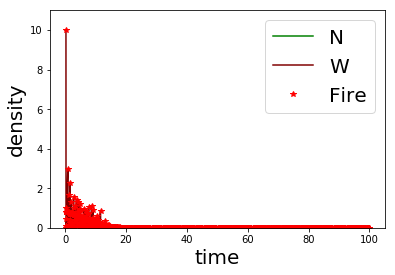

In [4]:
nomberFigure = len(N0)*len(W0)*len(FinalTime)*len(A)*len(M)*len(Alpha)*len(Beta)*len(Strength)
fig_by_loop = len(Freq) + 1

c=0
print("Time at the lunch of the simulation\n", tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure
for n0 in N0:
    for w0 in W0:
        Init = [n0, w0]
        for finalTime in FinalTime:
            for a in A:
                for m in M:
                    Param_phy = [a, m]
                    Init = [1., Param_phy[1]]
                    for strength in Strength:
                        for alpha in Alpha:
                            for beta in Beta:
                                name = DOSSIER+"n0="+str(Init[0])+"_w0="+str(Init[1])+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
                                param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name)           
                                c+=1
                                print(tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure